In [2]:
import numpy as np
import pandas as pd
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("./HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [5]:
q = pd.crosstab(df.left, df.salary)

In [8]:
q

salary,high,low,medium
left,,,
0,1155,5144,5129
1,82,2172,1317


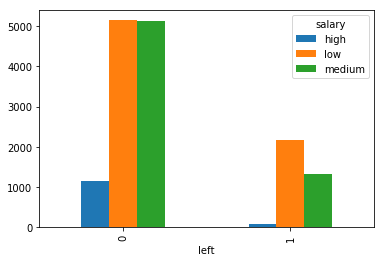

In [6]:
q.plot(kind = "bar")

In [7]:
s = q.sum(0)

In [8]:
type(s)

pandas.core.series.Series

In [9]:
s

salary
high      1237
low       7316
medium    6446
dtype: int64

In [10]:
qd = q.div(s, axis = 1)
qd

salary,high,low,medium
left,,,
0,0.933711,0.703116,0.795687
1,0.066289,0.296884,0.204313


In [11]:
qdt = qd.T


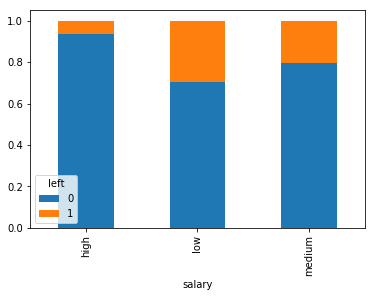

In [12]:
qdt.plot(kind = 'bar', stacked = True)

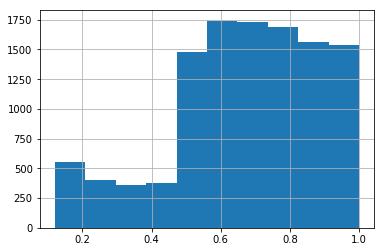

In [13]:
df[df.left == 0]['satisfaction_level'].hist()

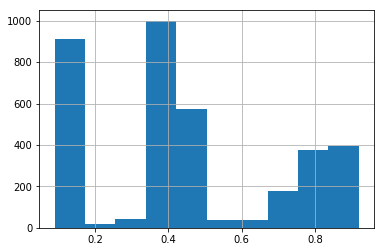

In [14]:
df[df.left == 1].satisfaction_level.hist()

In [15]:
model = LogisticRegression()

In [16]:
y, x = dmatrices('left~satisfaction_level+last_evaluation+number_project+average_montly_hours+time_spend_company+Work_accident+promotion_last_5years+C(sales)+C(salary) ', df, return_type = 'dataframe')

In [17]:
x

,Intercept,C(sales)[T.RandD],C(sales)[T.accounting],C(sales)[T.hr],C(sales)[T.management],C(sales)[T.marketing],C(sales)[T.product_mng],C(sales)[T.sales],C(sales)[T.support],C(sales)[T.technical],C(salary)[T.low],C(salary)[T.medium],satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.38,0.53,2.0,157.0,3.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.80,0.86,5.0,262.0,6.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.11,0.88,7.0,272.0,4.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.72,0.87,5.0,223.0,5.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.37,0.52,2.0,159.0,3.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.41,0.50,2.0,153.0,3.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.10,0.77,6.0,247.0,4.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.92,0.85,5.0,259.0,5.0,0.0,0.0
8,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.89,1.00,5.0,224.0,5.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.42,0.53,2.0,142.0,3.0,0.0,0.0


In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 0)

C:\Users\weite\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [20]:
x_train

,Intercept,C(sales)[T.RandD],C(sales)[T.accounting],C(sales)[T.hr],C(sales)[T.management],C(sales)[T.marketing],C(sales)[T.product_mng],C(sales)[T.sales],C(sales)[T.support],C(sales)[T.technical],C(salary)[T.low],C(salary)[T.medium],satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
12766,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.75,0.81,5.0,227.0,5.0,0.0,0.0
3536,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.13,0.91,2.0,149.0,5.0,0.0,0.0
10295,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.67,0.74,3.0,226.0,3.0,0.0,0.0
2137,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.52,0.43,2.0,199.0,2.0,0.0,0.0
14774,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.77,7.0,291.0,4.0,0.0,0.0
10574,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.97,0.78,3.0,268.0,3.0,1.0,0.0
11937,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.82,0.74,3.0,229.0,7.0,0.0,1.0
14983,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.72,0.84,5.0,257.0,5.0,0.0,0.0
7937,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.49,0.99,4.0,258.0,3.0,1.0,0.0
10886,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.63,0.71,4.0,244.0,2.0,0.0,0.0


In [21]:
x_train.astype

<bound method NDFrame.astype of        Intercept  C(sales)[T.RandD]  C(sales)[T.accounting]  C(sales)[T.hr]  \
12766        1.0                0.0                     0.0             0.0   
3536         1.0                0.0                     0.0             0.0   
10295        1.0                0.0                     0.0             0.0   
2137         1.0                0.0                     0.0             0.0   
14774        1.0                0.0                     1.0             0.0   
10574        1.0                0.0                     0.0             0.0   
11937        1.0                0.0                     0.0             0.0   
14983        1.0                0.0                     0.0             0.0   
7937         1.0                0.0                     0.0             0.0   
10886        1.0                0.0                     0.0             0.0   
1624         1.0                0.0                     0.0             0.0   
294          1.0    

In [24]:
y_train.values

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]])

In [26]:
model.fit(x_train.values, y_train.values)

C:\Users\weite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [28]:
model.score(x_train, y_train)

0.7905658804900408

In [29]:
model.predict_proba([[1,0,0,1,0,0,0,0,0,0,0,0, 0.5, 0.7, 4.0, 160, 3.0, 0, 0]])

array([[0.91610976, 0.08389024]])

In [31]:
pred = model.predict(x_test.values)

In [32]:
print(metrics.classification_report(y_test, pred))

             precision    recall  f1-score   support

        0.0       0.82      0.93      0.87      2299
        1.0       0.58      0.32      0.42       701

avg / total       0.76      0.79      0.76      3000



In [35]:
print(cross_val_score(LogisticRegression(), x, y, scoring = 'accuracy', cv = 10))

C:\Users\weite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\weite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\weite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\weite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[0.80746169 0.792      0.79533333 0.78733333 0.804      0.804
 0.794      0.79       0.74449633 0.73582388]


C:\Users\weite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\weite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [37]:
print(cross_val_score(LogisticRegression(),x,y,scoring = 'accuracy',cv = 10))

C:\Users\weite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\weite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\weite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\weite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

[0.80746169 0.792      0.79533333 0.78733333 0.804      0.804
 0.794      0.79       0.74449633 0.73582388]


C:\Users\weite\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
